In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats
import pylab
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
import statsmodels.api as sm


In [8]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values=["null"], index_col='DATE', parse_dates= True, infer_datetime_format= True)

In [9]:
mydatats.isna().sum()

WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [10]:
mydatats = mydatats.fillna(method='bfill')
mydatats.isna().sum()

WTI      0
BRENT    0
INR      0
NIFTY    0
dtype: int64

In [11]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.762050,49.207341,96.283934,0.181634
std,29.194685,32.816631,28.089831,1.893195
min,11.350000,9.820000,35.600000,-6.180000
25%,21.280000,19.740000,75.500000,-0.790000
50%,40.780000,39.950000,95.100000,0.180000
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [12]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,18.43,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


We need our data searies to be stationary. And we wknow that the restuen series is stationary.

In [13]:
mydatats["WTI_pct"]= mydatats.WTI.pct_change(1)*100
mydatats["WTI_sqr"]= mydatats.WTI_pct.mul(mydatats.WTI_pct)

In [14]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WTI_pct,WTI_sqr
DATE,,,,,,
1990-01-01,22.86,21.25,35.6,0.44,NaN,NaN
1990-02-01,22.11,19.81,35.6,2.45,-3.280840,10.763910
1990-03-01,18.43,18.39,35.9,-0.28,-16.644052,277.024482
1990-04-01,18.43,16.61,36.3,-6.18,0.000000,0.000000
1990-05-01,18.20,16.35,36.3,-1.62,-1.247965,1.557417


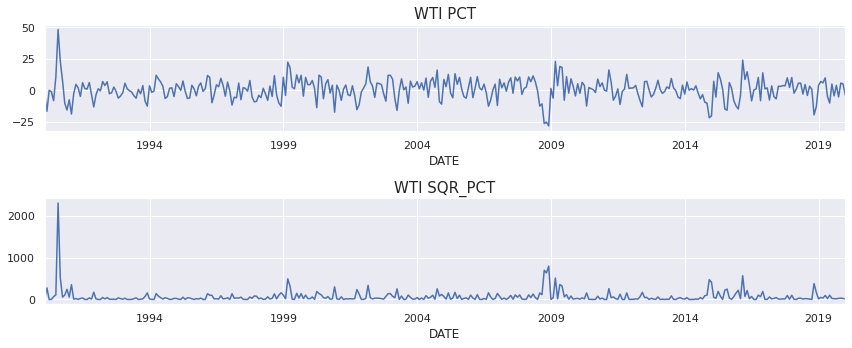

In [15]:
plt.subplot(2,1,1)
mydatats.WTI_pct[1:].plot(figsize=(12,5))
plt.title("WTI PCT", size = 15)

plt.subplot(2,1,2)
mydatats.WTI_sqr[1:].plot(figsize=(12,5))
plt.title("WTI SQR_PCT", size = 15)
plt.tight_layout()


Let's see the PACF for both return and sqr return

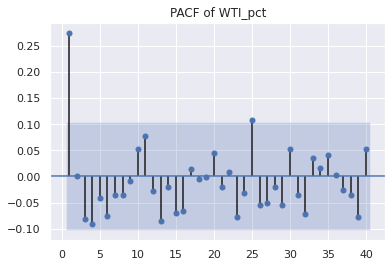

In [16]:
sgt.plot_pacf(mydatats.WTI_pct[1:], lags= 40, alpha= 0.05, zero=False, method="ols")
plt.title("PACF of WTI_pct")
plt.show()

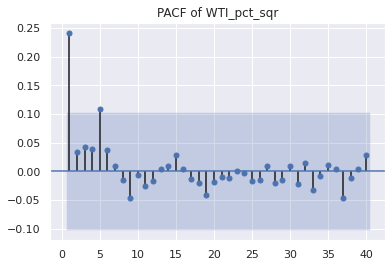

In [17]:
sgt.plot_pacf(mydatats.WTI_sqr[1:], lags= 40, alpha= 0.05, zero=False, method="ols")
plt.title("PACF of WTI_pct_sqr")
plt.show()

In [18]:
# ARCH(P)
!pip install arch

In [19]:
pip install arch

In [20]:
from arch import arch_model

In [21]:
model_arch = arch_model(mydatats.WTI_pct[1:])
estimates_arch = model_arch.fit()
print(estimates_arch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1258.9137571410074
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1258.3271237523945
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1258.0362335583063
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1258.0074446485285
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1258.0002162265132
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1257.9982722133323
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1257.9977058080503
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1257.9977020855445
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1257.9977013981754
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-sq

In [22]:
model_arch1 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "ARCH", p =1)
estimates_arch1 = model_arch1.fit(update_freq = 5)
print(estimates_arch1.summary())

Iteration:      5,   Func. Count:     28,   Neg. LLF: 1266.0579247921228
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1266.0455096844084
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                       ARCH   Log-Likelihood:               -1266.05
Distribution:                  Normal   AIC:                           2538.09
Method:            Maximum Likelihood   BIC:                           2549.75
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      357
Time:                        06:50:01   Df Model:                            3
       

In [23]:
model_arch2 = arch_model(mydatats.WTI_pct[1:], mean = "zero", vol = "ARCH", p =1)
estimates_arch2 = model_arch2.fit(update_freq = 5)
print(estimates_arch2.summary())

Iteration:      5,   Func. Count:     23,   Neg. LLF: 1268.5220672888063
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1268.5220641607734
            Iterations: 6
            Function evaluations: 27
            Gradient evaluations: 6
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                WTI_pct   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:               -1268.52
Distribution:                  Normal   AIC:                           2541.04
Method:            Maximum Likelihood   BIC:                           2548.82
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      358
Time:                        06:50:01   Df Model:                            2
       

**Higher order ARCH Model**

In [24]:
model_arch3 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "ARCH", p =2)
estimates_arch3 = model_arch3.fit(update_freq = 5)
print(estimates_arch3.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1263.835974446243
Iteration:     10,   Func. Count:     65,   Neg. LLF: 1263.8118858207763
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1263.8114721268587
            Iterations: 12
            Function evaluations: 77
            Gradient evaluations: 12
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -1263.81
Distribution:                  Normal   AIC:                           2535.62
Method:            Maximum Likelihood   BIC:                           2551.17
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      356
Time:       

In [25]:
model_arch4 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "ARCH", p =4)
estimates_arch4 = model_arch4.fit(update_freq = 5)
print(estimates_arch4.summary())

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1262.0419214100334
Iteration:     10,   Func. Count:     88,   Neg. LLF: 1261.766868971389
Iteration:     15,   Func. Count:    128,   Neg. LLF: 1261.6518707937807
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1261.6515451414753
            Iterations: 16
            Function evaluations: 137
            Gradient evaluations: 16
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -1261.65
Distribution:                  Normal   AIC:                           2535.30
Method:            Maximum Likelihood   BIC:                           2558.62
                                        No. Observations:                  360
Date:            

**GARCH**

In [26]:
model_garch_1_1 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "GARCH", p =1, q = 1)
estimates_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
print(estimates_garch_1_1.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1258.0002162265132
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1257.9977013981754
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1258.00
Distribution:                  Normal   AIC:                           2524.00
Method:            Maximum Likelihood   BIC:                           2539.54
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      356
Time:                        06:50:01   Df Model:                            4
       

alpha: How current market return is sensitive to past realised return volatility

beta: The part of the squared return vol spilover to current period. (persistenece of the volatility)

In [27]:
model_garch_1_2 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "GARCH", p =1, q = 2)
estimates_garch_1_2 = model_garch_1_2.fit(update_freq = 10)
print(estimates_garch_1_2.summary())

Iteration:     10,   Func. Count:     77,   Neg. LLF: 1255.3924149228878
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1255.3905386044817
            Iterations: 13
            Function evaluations: 98
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -1255.39
Distribution:                  Normal   AIC:                           2520.78
Method:            Maximum Likelihood   BIC:                           2540.21
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      355
Time:                        06:50:01   Df Model:                            5
     

X1 =  Income
X2 = Wealth   
Condition: My main income comes fro Wealth
X1 = Income
X2 = Z score of X1
Henece there will be possibility of High multocollinearity among the variables. 

In [28]:
model_garch_1_3 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "GARCH", p =1, q = 3)
estimates_garch_1_3 = model_garch_1_3.fit(update_freq = 10)
print(estimates_garch_1_3.summary())

Iteration:     10,   Func. Count:     86,   Neg. LLF: 1256.7749723649983
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1256.765615482614
            Iterations: 15
            Function evaluations: 127
            Gradient evaluations: 15
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1256.77
Distribution:                  Normal   AIC:                           2525.53
Method:            Maximum Likelihood   BIC:                           2548.85
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      354
Time:                        06:50:01   Df Model:                            6
     

In [29]:
model_garch_2_3 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "GARCH", p =2, q = 3)
estimates_garch_2_3 = model_garch_2_3.fit(update_freq = 10)
print(estimates_garch_2_3.summary())

Iteration:     10,   Func. Count:     97,   Neg. LLF: 1256.1287486878762
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1256.0566825134958
            Iterations: 18
            Function evaluations: 169
            Gradient evaluations: 18
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1256.06
Distribution:                  Normal   AIC:                           2526.11
Method:            Maximum Likelihood   BIC:                           2553.32
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      353
Time:                        06:50:01   Df Model:                            7
    

In [30]:
model_garch_1_1 = arch_model(mydatats.WTI_pct[1:], mean = "constant", vol = "GARCH", p =1, q = 1)
estimates_garch_1_1 = model_garch_1_1.fit(update_freq = 10)
print(estimates_garch_1_1.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1257.9977013981754
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1258.00
Distribution:                  Normal   AIC:                           2524.00
Method:            Maximum Likelihood   BIC:                           2539.54
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      356
Time:                        06:50:01   Df Model:                            4
                                 Mean Model                                
    

In [31]:
model1_garch_1_1 = arch_model(mydatats.NIFTY, mean = "constant", vol = "GARCH", p =1, q = 1)
estimates1_garch_1_1 = model1_garch_1_1.fit()
print(estimates1_garch_1_1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 704.0704868449142
Iteration:      2,   Func. Count:     15,   Neg. LLF: 703.7950233157476
Iteration:      3,   Func. Count:     22,   Neg. LLF: 703.4348415333087
Iteration:      4,   Func. Count:     29,   Neg. LLF: 702.330360175841
Iteration:      5,   Func. Count:     36,   Neg. LLF: 702.2295659083068
Iteration:      6,   Func. Count:     42,   Neg. LLF: 701.9153718336804
Iteration:      7,   Func. Count:     49,   Neg. LLF: 701.7832126745394
Iteration:      8,   Func. Count:     58,   Neg. LLF: 701.7801942706476
Iteration:      9,   Func. Count:     64,   Neg. LLF: 701.7428798481044
Iteration:     10,   Func. Count:     70,   Neg. LLF: 701.7320881723028
Iteration:     11,   Func. Count:     76,   Neg. LLF: 701.7317444095124
Iteration:     12,   Func. Count:     82,   Neg. LLF: 701.7317329717634
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 701.7317331898603
            Iterations: 12
 

In [32]:
model2_garch_1_1 = arch_model(mydatats.BRENT.diff().dropna(), mean = "constant", vol = "GARCH", p =1, q = 1)
estimates2_garch_1_1 = model2_garch_1_1.fit()
print(estimates2_garch_1_1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 969.6440391740973
Iteration:      2,   Func. Count:     14,   Neg. LLF: 969.0282005669294
Iteration:      3,   Func. Count:     22,   Neg. LLF: 968.9677433182785
Iteration:      4,   Func. Count:     28,   Neg. LLF: 965.3629052744851
Iteration:      5,   Func. Count:     35,   Neg. LLF: 963.4094849602742
Iteration:      6,   Func. Count:     41,   Neg. LLF: 963.026256499322
Iteration:      7,   Func. Count:     48,   Neg. LLF: 962.6140105366543
Iteration:      8,   Func. Count:     55,   Neg. LLF: 962.4760693788144
Iteration:      9,   Func. Count:     61,   Neg. LLF: 962.4714863963611
Iteration:     10,   Func. Count:     67,   Neg. LLF: 962.4714174975118
Iteration:     11,   Func. Count:     73,   Neg. LLF: 962.4714143212609
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 962.4714156581645
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11

In [33]:
model3_garch_1_1 = arch_model(mydatats.BRENT, mean = "constant", vol = "GARCH", p =1, q = 1)
estimates3_garch_1_1 = model3_garch_1_1.fit()
print(estimates3_garch_1_1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1687.808411787387
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1684.004454889779
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1606.977542367379
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1554.3515662324744
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1520.0301967349365
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1518.8511074947785
Iteration:      7,   Func. Count:     46,   Neg. LLF: 1512.6667677677647
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1510.584528900885
Iteration:      9,   Func. Count:     60,   Neg. LLF: 1508.5552213030062
Iteration:     10,   Func. Count:     67,   Neg. LLF: 1506.6890007687725
Iteration:     11,   Func. Count:     74,   Neg. LLF: 1504.9954666852677
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1504.0806502702071
Iteration:     13,   Func. Count:     87,   Neg. LLF: 1497.225925606719
Iteration:     14,   Func. Count:     94,   Neg. LLF: 14

**AUTO ARMA**

In [34]:
pip install pmdarima

In [35]:
from pmdarima.arima import auto_arima

In [37]:
model_auto_wti = auto_arima(mydatats.WTI_pct[1:])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [38]:
model_auto_wti

ARIMA(maxiter=50, method='lbfgs', order=(3, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [39]:
print(model_auto_wti.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1260.818
Date:                Sat, 19 Sep 2020   AIC                           2533.637
Time:                        06:52:15   BIC                           2556.953
Sample:                             0   HQIC                          2542.908
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1175      0.088      1.328      0.184      -0.056       0.291
ar.L1          1.0924      0.106     10.287      0.000       0.884       1.301
ar.L2         -0.1989      0.083     -2.384      0.0

In [43]:
model_auto_arima = auto_arima(mydatats.WTI_pct[1:], exogenous= mydatats[["NIFTY", "INR"]][1:], m = 5, max_order= None, max_p= 4, max_q= 2, max_P=4, max_Q=4,
                              max_D=1, maxiter= 20, alpha = 0.05, n_jobs=1, trend = "ct", information_criterion='aic')
print(model_auto_arima.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1264.542
Date:                Sat, 19 Sep 2020   AIC                           2541.085
Time:                        07:03:45   BIC                           2564.401
Sample:                    02-01-1990   HQIC                          2550.356
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4602      2.218      0.207      0.836      -3.887       4.807
drift          0.0018      0.012      0.144      0.885      -0.022       0.026
NIFTY          0.1557      0.193      0.809      0.4

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
